# Exercise - Classification of Survived Passengers on Titanic Dataset

The 'titanic-train.csv' contains data of passenger details aboard the titanic, and whether they survived or not. We have to make a model which will predict their survival. The features are as follows:  

Survived - Survival (0 = No; 1 = Yes)  
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
Name - Name  
Sex - Sex  
Age - Age  
SibSp - Number of Siblings/Spouses Aboard  
Parch - Number of Parents/Children Aboard  
Ticket - Ticket Number  
Fare - Passenger Fare (British pound)  
Cabin - Cabin  
Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  

## Solve the following questions:
1. Based on logical reasoning, decide which variables are absolutely not required or relevant to the model. List them down and drop those columns. 
2. Plot a bar chart of the survived column. 
3. Plot a bar chart of the number of females who survived and not, and similarly males who survived and not. 
4. **BONUS(0.3%)** Plot a stacked bar chart of survived or not based on PClass(i.e how many survived and not for 1st, 2nd and 3rd class). The graph can be made by referring to https://matplotlib.org/examples/pylab_examples/bar_stacked.html
5. Check if there are missing values in any columns. Remove such rows in the dataset.  
6. Convert categorical values (if any) to numbers in the dataset.
7. Plot a heatmap of the correlation between all columns. There are columns are inter-related. Which are those colums? Can you drop either one of the inter-related column before proceeding ahead?
8. Now split your dataset into training & testing dataset with 80:20 ratio using train_test_split function. Use a random state which will give an approximately equal number of survived and non survived rows in the training test. Validate using a bar chart on the training dataset. 

## Decision Tree Modelling
#### Use a decision tree classifier with a minimum depth of 6, to train your model. Obtain the decision tree & confusion matrix for the predictions. Obtain the score of the model.

## Perceptron Modelling
#### Use a perceptron model with a max_iter value 400, to train your model. Obtain the confusion matrix for the predictions. Obtain the score of the model. 

## Which of the two models fairs better? 


### BONUS(0.5%)
There is a relation between age and PClass. Can you fill in the missing values of age with this information instead of dropping the rows entirely? You will have to justify with some data analysis and visulization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
titanic = pd.read_csv("./data/titanic-train.csv")
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 1. Based on logical reasoning, decide which variables are absolutely not required or relevant to the model. List them down and drop those columns. 

The columns which are absolutely not required are :
Name, Ticket, Fare, Cabin, 

In [3]:
df=titanic
df.shape

(891, 12)

In [4]:
df=df.drop(['Name','Ticket','Fare','Cabin','PassengerId'], axis=1)

In [5]:
df.head()
df.shape

(891, 7)

#### 2. Plot a bar chart of the survived column.  

(array([0, 1]), <a list of 2 Text xticklabel objects>)

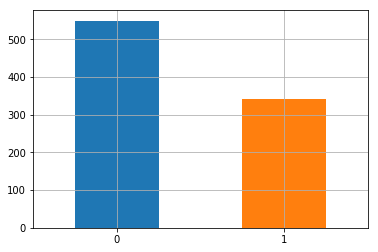

In [6]:
df['Survived'].value_counts().plot(kind='bar', grid=True)
plt.xticks(rotation=0)

#### 3. Plot a bar chart of the number of females who survived and not, and similarly males who survived and not. 

In [7]:
female=df[df['Sex'] == 'female']
male=df[df['Sex'] == 'male']


(array([0, 1]), <a list of 2 Text xticklabel objects>)

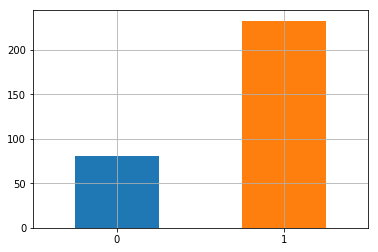

In [8]:
female['Survived'].value_counts(sort=0).plot(kind='bar', grid=True)
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

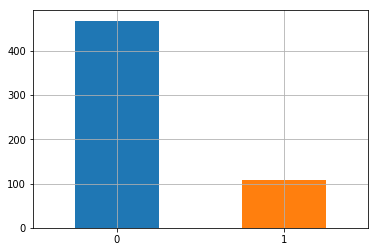

In [9]:
male['Survived'].value_counts().plot(kind='bar', grid=True)
plt.xticks(rotation=0)

#### 4. **BONUS(0.3%)** Plot a stacked bar chart of survived or not based on Pclass(i.e how many survived and not for 1st, 2nd and 3rd class). The graph can be made by referring to https://matplotlib.org/examples/pylab_examples/bar_stacked.html

In [10]:
cls=df['Pclass'].value_counts(sort=0).index.tolist()
cls

[1, 2, 3]

In [11]:
cls=df['Pclass'].value_counts(sort=0).index.tolist()

# abc=pd.DataFrame()
sur=[]
nsur=[]
group_class = df.groupby(['Pclass'])
for x in cls:
    xyz=group_class.get_group(x)
    a=xyz['Survived'].value_counts(sort=0).tolist()
    sur.append(a[0])
    nsur.append(a[1])
print(sur)
print(nsur)

[80, 97, 372]
[136, 87, 119]


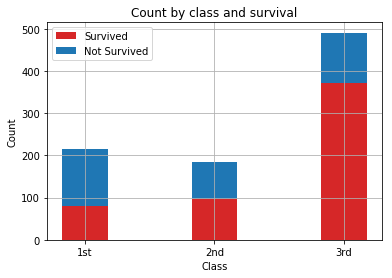

In [12]:

N = 3
# menMeans = (20, 35, 30, 35, 27)
# womenMeans = (25, 32, 34, 20, 25)
# menStd = (2, 3, 4, 1, 2)
# womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, sur, width, color='#d62728')
p2 = plt.bar(ind, nsur, width,
             bottom=sur)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count by class and survival')
plt.xticks(ind, ('1st', '2nd', '3rd'))
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Survived', 'Not Survived'))
plt.grid()
plt.show()

#### 5. Check if there are missing values in any columns. Remove such rows in the dataset.  

In [13]:
df=df.dropna()

#### 6. Convert categorical values (if any) to numbers in the dataset.

In [14]:
gender_map={'female':0, "male":1}
df['sval']=df['Sex'].apply(lambda x: gender_map[x])

e_map={'C':0, 'S':1, 'Q':2}
df['eval']=df['Embarked'].apply(lambda x: e_map[x])

df.head()

c:\users\jigar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\jigar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,sval,eval
0,0,3,male,22.0,1,0,S,1,1
1,1,1,female,38.0,1,0,C,0,0
2,1,3,female,26.0,0,0,S,0,1
3,1,1,female,35.0,1,0,S,0,1
4,0,3,male,35.0,0,0,S,1,1


#### 7. Plot a heatmap of the correlation between all columns. There are columns are inter-related. Which are those colums? Can you drop either one of the inter-related column before proceeding ahead?


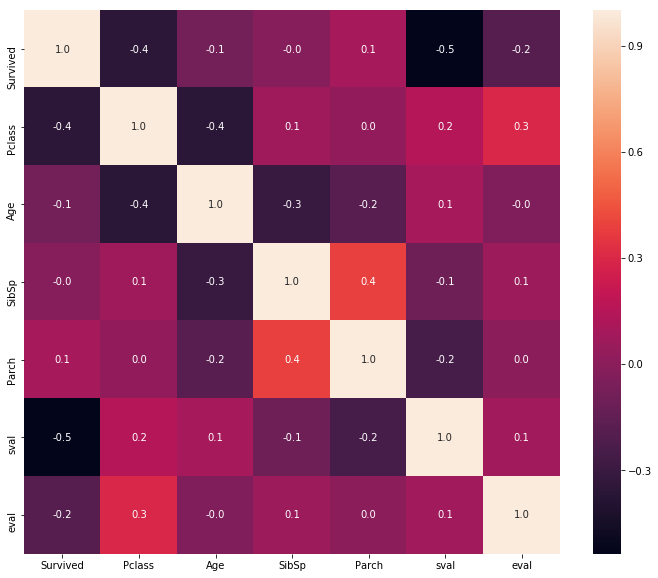

In [15]:
plt.figure(figsize=(12,10))
sb.heatmap(df.corr(), annot=True, fmt='.1f')

The inter-related columns are 'SibSp' and 'Parch'

I am dropping the 'Parch' column

In [16]:
df=df.drop('SibSp',axis=1)
df.head()

,Survived,Pclass,Sex,Age,Parch,Embarked,sval,eval
0,0,3,male,22.0,0,S,1,1
1,1,1,female,38.0,0,C,0,0
2,1,3,female,26.0,0,S,0,1
3,1,1,female,35.0,0,S,0,1
4,0,3,male,35.0,0,S,1,1


#### 8. Now split your dataset into training & testing dataset with 80:20 ratio using train_test_split function. Use a random state which will give an approximately equal number of survived and non survived rows in the training test. Validate using a bar chart on the training dataset. 

In [17]:
mycols=['Pclass','Age','Parch','sval','eval']
x=df[mycols]
y=df['Survived']

In [115]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test=tts(x,y,test_size=0.2, random_state=454)
prity_train.value_counts()

0    328
1    241
Name: Survived, dtype: int64

## Decision Tree Modelling
#### Use a decision tree classifier with a minimum depth of 6, to train your model. Obtain the decision tree & confusion matrix for the predictions. Obtain the score of the model.

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [120]:
decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=6)
obtained_tree = decisiontree.fit(x_train, y_train)
print('Extracted Classes', decisiontree.classes_)

Extracted Classes [0 1]


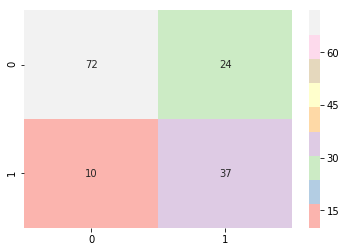

In [121]:
Predicted_Species = obtained_tree.predict(x_test)
cf= confusion_matrix(y_test, Predicted_Species)
sb.heatmap(cf, annot=True, cmap='Pastel1', xticklabels=decisiontree.classes_, yticklabels=decisiontree.classes_)

In [129]:
obtained_tree.score(x,y)

0.8286516853932584

In [122]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Jigar\\Desktop\\VIT\\Python\\Graphviz2.38\\bin'


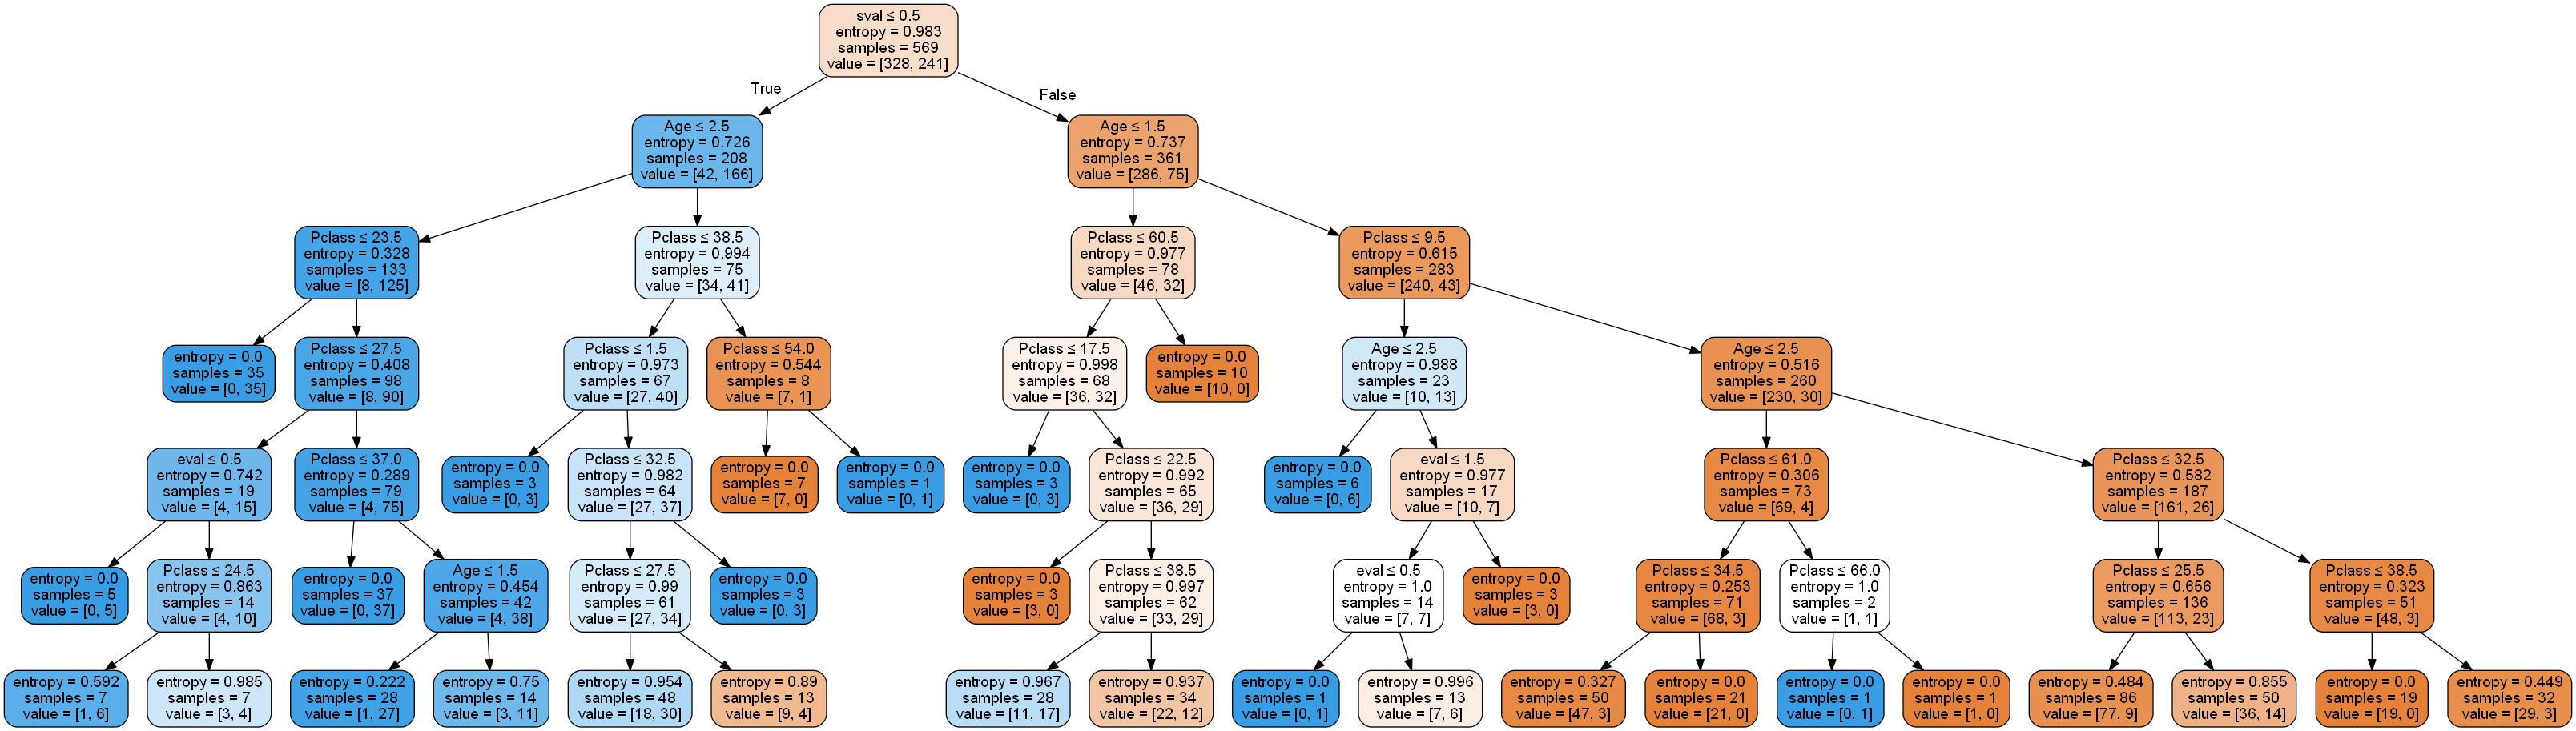

In [132]:
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
DecisionTreeImg = StringIO()

export_graphviz(obtained_tree, out_file=DecisionTreeImg, filled = True, rounded = True, feature_names=["Age", 'Pclass', "Parch",'sval','eval'], special_characters=True)
graph = pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_jpg())

## Perceptron Modelling
#### Use a perceptron model with a max_iter value 400, to train your model. Obtain the confusion matrix for the predictions. Obtain the score of the model. 

In [126]:
from sklearn.linear_model import Perceptron

Classifier=Perceptron(max_iter=400)
model=Classifier.fit(x_train,y_train)
# print(x_test)
predictions=model.predict(x_test)
# print(predictions)

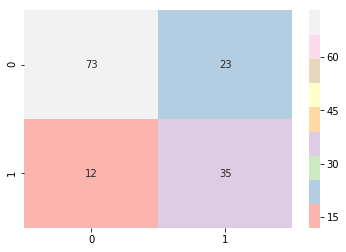

In [127]:
cf= confusion_matrix(y_test, predictions)
sb.heatmap(cf, annot=True, cmap='Pastel1', xticklabels=decisiontree.classes_, yticklabels=decisiontree.classes_)

In [128]:
model.score(x,y)

0.8075842696629213

## Which of the two models fairs better? 

The Decision tree model fairs better than the perceptron model.

### BONUS(0.5%)
There is a relation between age and PClass. Can you fill in the missing values of age with this information instead of dropping the rows entirely? You will have to justify with some data analysis and visulization.